# Handwritten Digit Recognizer

# Libraries to Load

In [7]:
# Basic libraries for data manipulation
import numpy as np
import pandas as pd

#Data visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc('font', size=16)
matplotlib.rc('figure', facecolor='white')
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Metrics
from sklearn.metrics import confusion_matrix, make_scorer, classification_report

# Convolutional Neural Network 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [9]:
digit_dataframe = pd.read_csv('train.csv') #Importing the database
digit_dataframe.head(20) #Visualize the first 20 rows and the colunms of the database

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


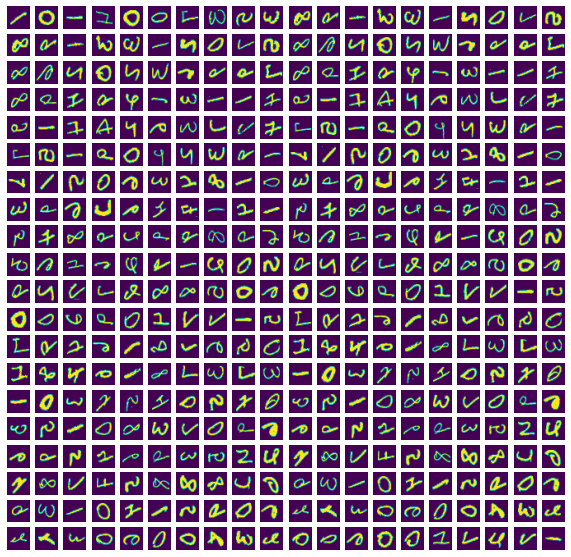

In [10]:
plt.rcParams['figure.figsize'] = (10.0,10.0)  

X_show = digit_dataframe.drop('label',1).values
_, axarr = plt.subplots(20,20,figsize=(10,10))
for i in range(20):
    for j in range(20):
        axarr[i,j].imshow(X_show[int(np.linspace(10*i+j,10*i+j+1,1))].reshape((28,28), order = 'F'))          
        axarr[i,j].axis('off') 

/home/elopezfune/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


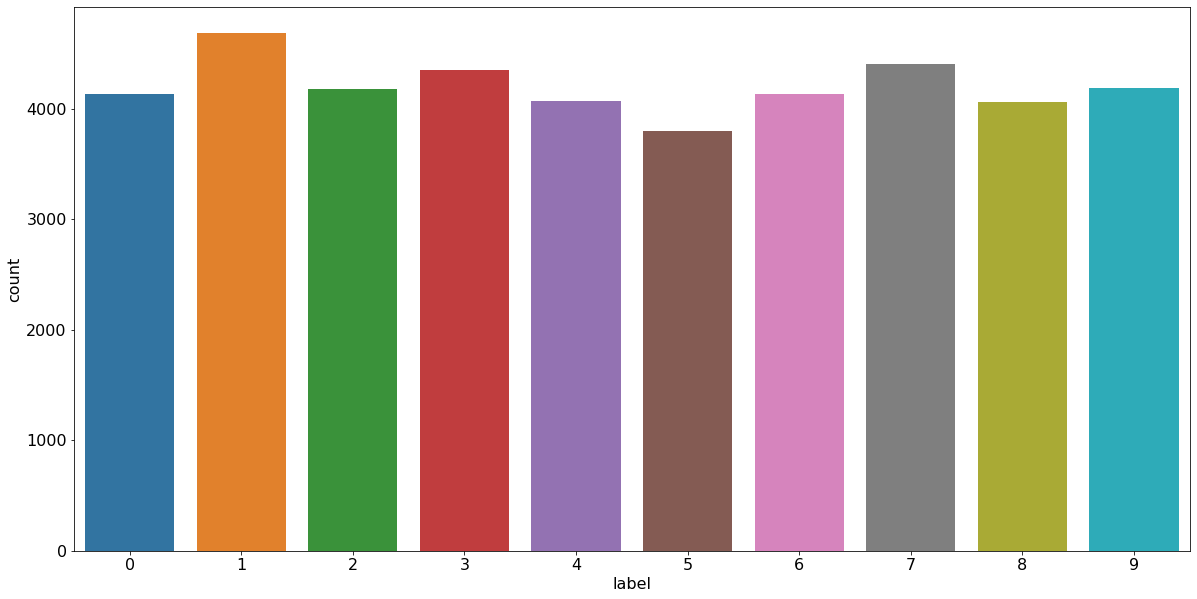

In [11]:
plt.rcParams['figure.figsize'] = (20.0,10.0)  
sns.countplot(digit_dataframe.label)
plt.show()

# Train Test Split

In [12]:
X_train, X_tests, y_train, y_tests = train_test_split(digit_dataframe.drop('label',1),
                                                      digit_dataframe.label,test_size=0.7,
                                                      stratify=digit_dataframe.label)

# Random Forest model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1240
           1       1.00      1.00      1.00      1405
           2       1.00      1.00      1.00      1253
           3       1.00      1.00      1.00      1305
           4       1.00      1.00      1.00      1222
           5       1.00      1.00      1.00      1139
           6       1.00      1.00      1.00      1241
           7       1.00      1.00      1.00      1320
           8       1.00      1.00      1.00      1219
           9       1.00      1.00      1.00      1256

    accuracy                           1.00     12600
   macro avg       1.00      1.00      1.00     12600
weighted avg       1.00      1.00      1.00     12600



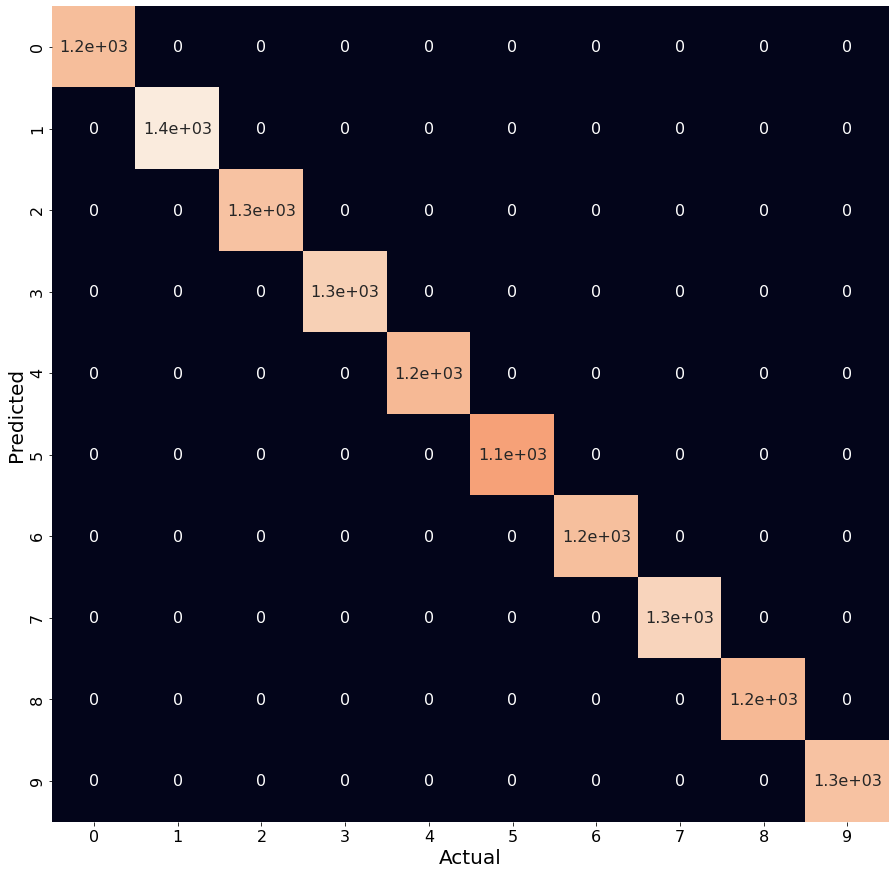

In [13]:
param_grid = [{'n_estimators' : list(range(10,300,10)),
               'max_features' : list(range(1,5,5))}]

def my_score_func(y_true, y_pred):
    cf_matrix = confusion_matrix(y_true,y_pred)
    cf_matrix = np.sum(np.array(cf_matrix)**2)-np.trace(np.array(cf_matrix)**2)
    return cf_matrix

scorer = make_scorer(my_score_func, greater_is_better=False)

# Create grid search object
model = GridSearchCV(RandomForestClassifier(),
                     param_grid = param_grid,
                     scoring=scorer,
                     cv = 5,
                     verbose=False,
                     n_jobs=-1)

# Fit on data
model = model.fit(X_train, y_train)
y_preds = model.predict(X_train)

print(classification_report(y_train,y_preds))
cf_matrix = confusion_matrix(y_train,y_preds)

fig = plt.figure(figsize = (15,15))
sns.heatmap(cf_matrix, annot=True,cbar=False,annot_kws={"size": 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.show()

Test the model with unseen values.

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      2892
           1       0.97      0.99      0.98      3279
           2       0.95      0.96      0.96      2924
           3       0.91      0.93      0.92      3046
           4       0.96      0.95      0.95      2850
           5       0.97      0.90      0.93      2656
           6       0.95      0.98      0.97      2896
           7       0.96      0.94      0.95      3081
           8       0.94      0.91      0.92      2844
           9       0.91      0.93      0.92      2932

    accuracy                           0.95     29400
   macro avg       0.95      0.95      0.95     29400
weighted avg       0.95      0.95      0.95     29400



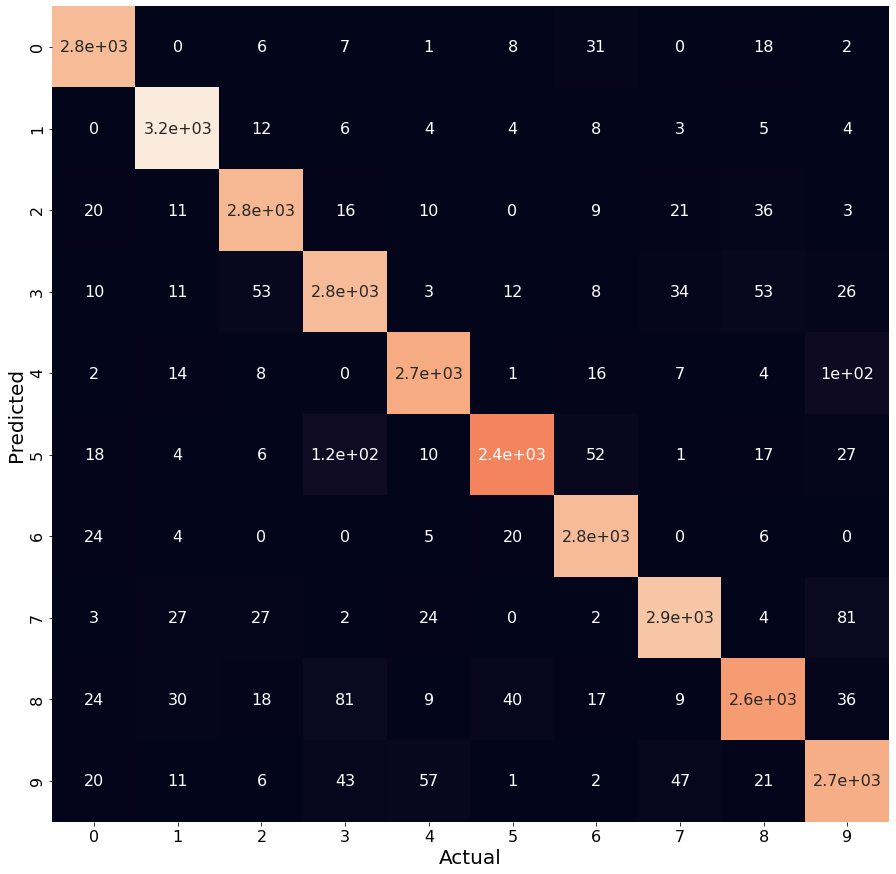

In [14]:
y_preds = model.predict(X_tests)
print(classification_report(y_tests,y_preds))
cf_matrix = confusion_matrix(y_tests,y_preds)

fig = plt.figure(figsize = (15,15))
sns.heatmap(cf_matrix, annot=True,cbar=False,annot_kws={"size": 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.show()

The predictions on the test subsample scored 95% of accuracy, which points out that the model is overfitted, as the accuracy of the model is of 100%.

# kNN model

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1240
           1       0.95      1.00      0.97      1405
           2       0.98      0.96      0.97      1253
           3       0.98      0.98      0.98      1305
           4       0.98      0.97      0.98      1222
           5       0.98      0.97      0.97      1139
           6       0.98      0.99      0.99      1241
           7       0.98      0.98      0.98      1320
           8       0.99      0.95      0.97      1219
           9       0.97      0.97      0.97      1256

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



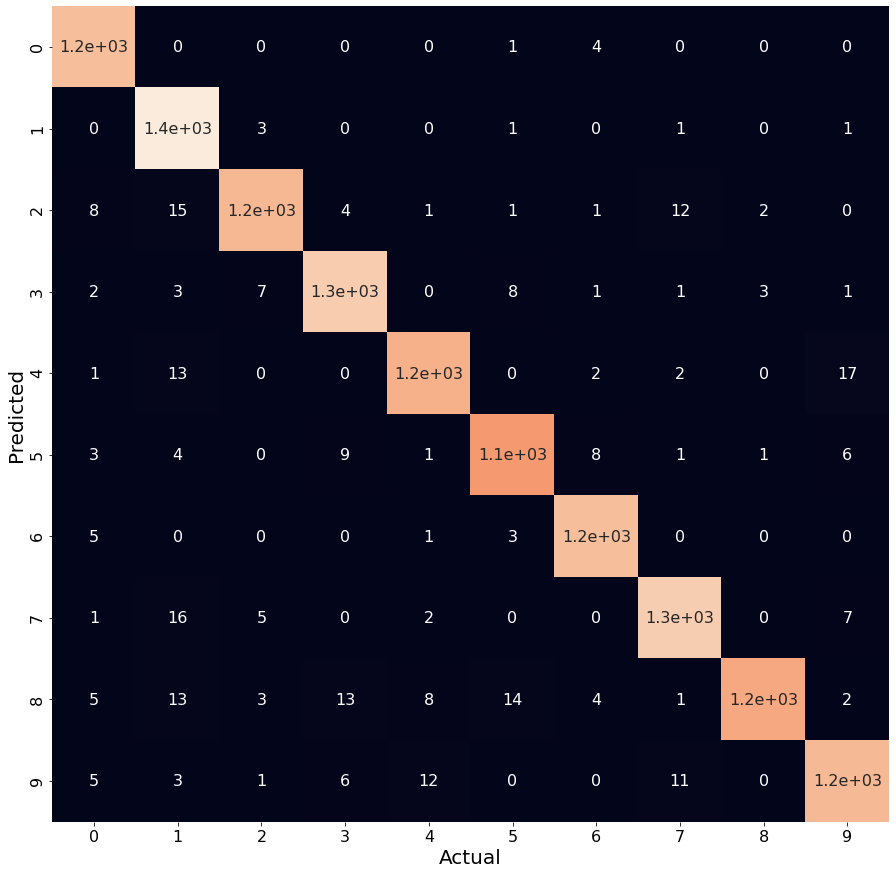

In [15]:
param_grid = [{'n_neighbors' : list(range(3,9)),
               'leaf_size' : list(range(10,60,10))}]

def my_score_func(y_true, y_pred):
    cf_matrix = confusion_matrix(y_true,y_pred)
    cf_matrix = np.sum(np.array(cf_matrix)**2)-np.trace(np.array(cf_matrix)**2)
    return cf_matrix

scorer = make_scorer(my_score_func, greater_is_better=False)

# Create grid search object
model = GridSearchCV(KNeighborsClassifier(),
                     param_grid = param_grid,
                     scoring=scorer,
                     cv = 5,
                     verbose=False,
                     n_jobs=-1)

# Fit on data
model = model.fit(X_train, y_train)
y_preds = model.predict(X_train)

print(classification_report(y_train,y_preds))
cf_matrix = confusion_matrix(y_train,y_preds)

fig = plt.figure(figsize = (15,15))
sns.heatmap(cf_matrix, annot=True,cbar=False,annot_kws={"size": 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2892
           1       0.93      1.00      0.96      3279
           2       0.97      0.94      0.96      2924
           3       0.94      0.95      0.95      3046
           4       0.96      0.95      0.95      2850
           5       0.94      0.94      0.94      2656
           6       0.97      0.98      0.98      2896
           7       0.95      0.96      0.95      3081
           8       0.98      0.89      0.93      2844
           9       0.92      0.94      0.93      2932

    accuracy                           0.95     29400
   macro avg       0.95      0.95      0.95     29400
weighted avg       0.95      0.95      0.95     29400



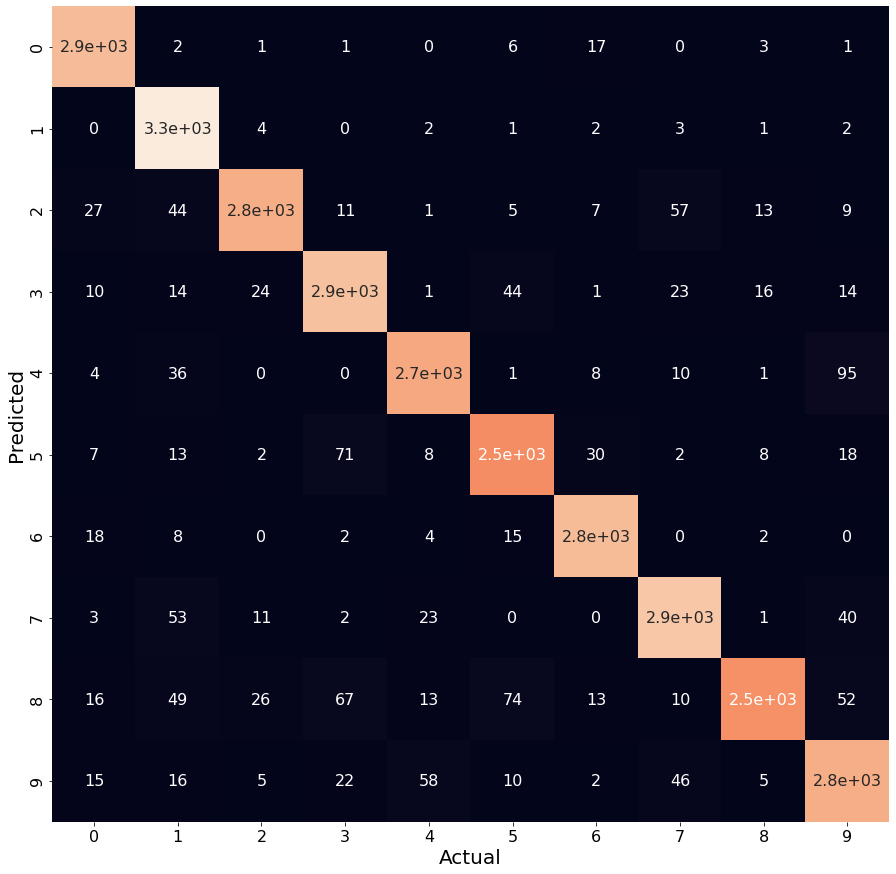

In [16]:
y_preds = model.predict(X_tests)
print(classification_report(y_tests,y_preds))
cf_matrix = confusion_matrix(y_tests,y_preds)

fig = plt.figure(figsize = (15,15))
sns.heatmap(cf_matrix, annot=True,cbar=False,annot_kws={"size": 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.show()

The predictions on the test subsample scored 95% of accuracy, and the one of the model is of 98%. This model looks good for predictions.

# CNN with KERAS

Epoch 1/5
394/394 [==============================] - 8s 21ms/step - loss: 0.4099 - accuracy: 0.8763
Epoch 2/5
394/394 [==============================] - 9s 23ms/step - loss: 0.1228 - accuracy: 0.9617
Epoch 3/5
394/394 [==============================] - 10s 26ms/step - loss: 0.0700 - accuracy: 0.9785
Epoch 4/5
394/394 [==============================] - 9s 23ms/step - loss: 0.0481 - accuracy: 0.9860
Epoch 5/5
394/394 [==============================] - 11s 27ms/step - loss: 0.0324 - accuracy: 0.9911
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1240
           1       1.00      1.00      1.00      1405
           2       1.00      1.00      1.00      1253
           3       0.99      1.00      1.00      1305
           4       1.00      1.00      1.00      1222
           5       1.00      1.00      1.00      1139
           6       1.00      1.00      1.00      1241
           7       0.99      1.00      0.99      1320
           

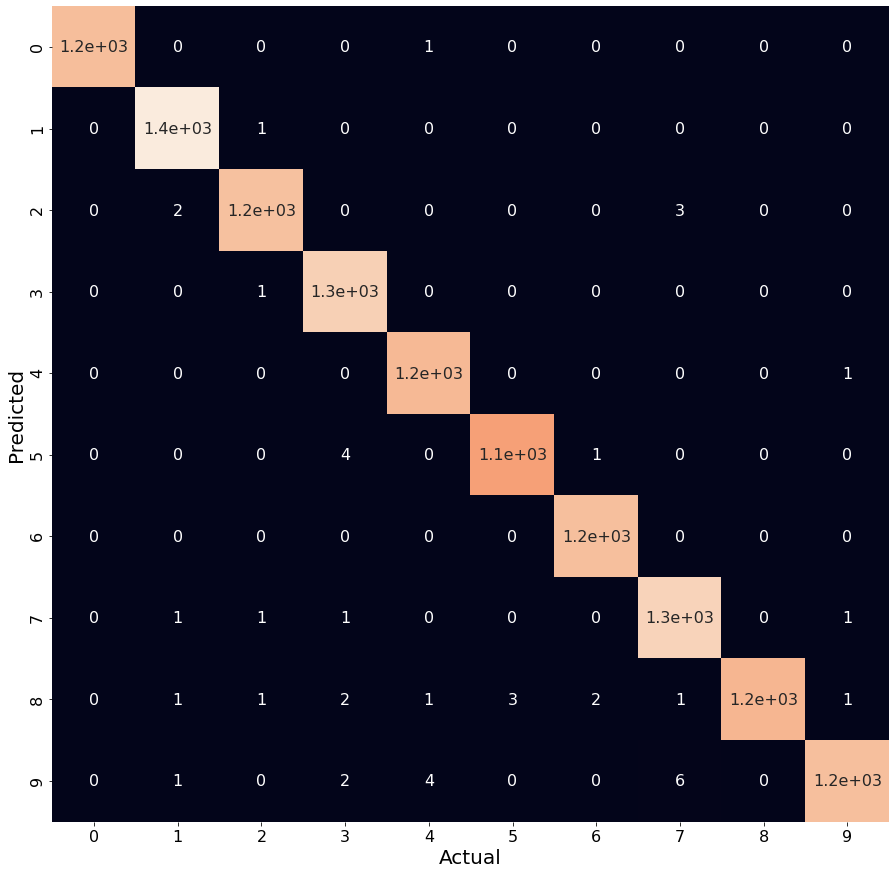

In [17]:
X_train_cnn=X_train.values.reshape((-1, 28, 28, 1)) / 255.0 #Reshaping the images to 28x28 matrices in 1 channel
y_train_cnn=to_categorical(y_train) #encode the labels into one hot vectors

model = Sequential() #Defining the model
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='sigmoid'))
# Compile the model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_cnn, y_train_cnn, epochs=5, batch_size=32, verbose=1)

y_preds = model.predict(X_train_cnn)
y_preds = np.argmax(y_preds, axis=1)

y_preds

print(classification_report(y_train,y_preds))
cf_matrix = confusion_matrix(y_train,y_preds)

fig = plt.figure(figsize = (15,15))
sns.heatmap(cf_matrix, annot=True,cbar=False,annot_kws={"size": 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.show()

Test the model with unseen values

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2892
           1       0.98      0.99      0.98      3279
           2       0.97      0.97      0.97      2924
           3       0.97      0.98      0.97      3046
           4       0.96      0.98      0.97      2850
           5       0.98      0.97      0.98      2656
           6       0.98      0.99      0.98      2896
           7       0.97      0.98      0.98      3081
           8       0.98      0.95      0.96      2844
           9       0.97      0.96      0.97      2932

    accuracy                           0.97     29400
   macro avg       0.98      0.97      0.97     29400
weighted avg       0.97      0.97      0.97     29400



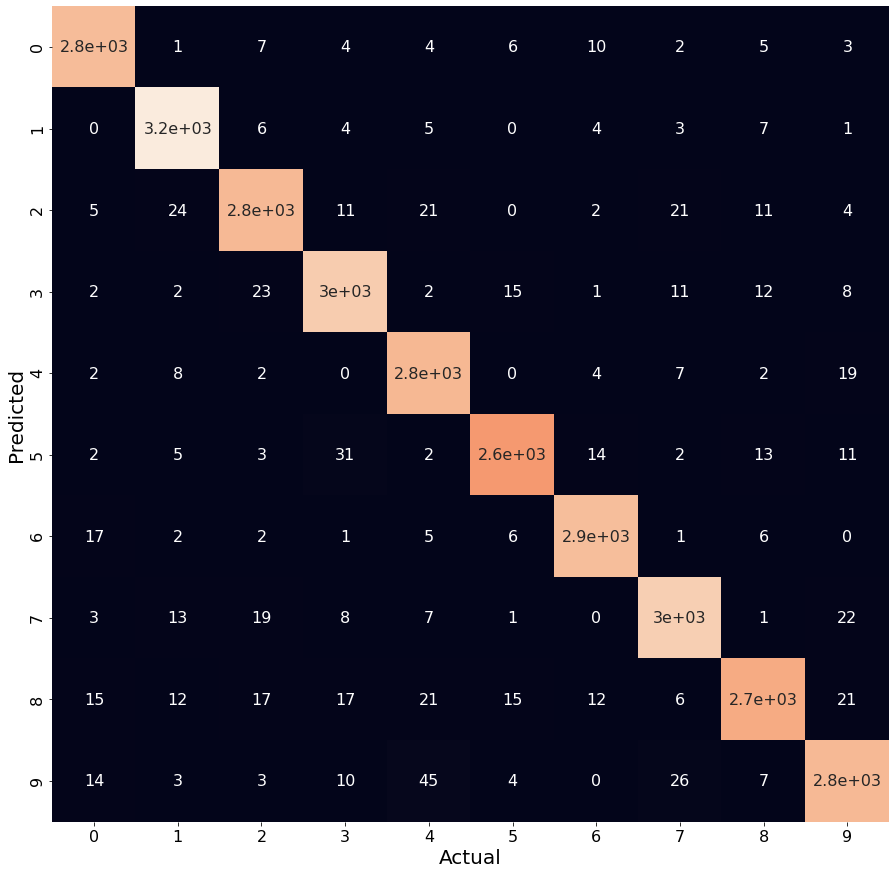

In [18]:
X_tests_cnn=X_tests.values.reshape((-1, 28, 28, 1)) / 255.0 #Reshaping the images to 28x28 matrices in 1 channel
y_preds = model.predict(X_tests_cnn)
y_preds = np.argmax(y_preds, axis=1)

print(classification_report(y_tests,y_preds))
cf_matrix = confusion_matrix(y_tests,y_preds)

fig = plt.figure(figsize = (15,15))
sns.heatmap(cf_matrix, annot=True,cbar=False,annot_kws={"size": 16})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Actual',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.show()

The predictions on the test subsample scored 97% of accuracy, and the one of the model is of 100%. This model looks good for predictions.